In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

data = et.data.get_data('cold-springs-fire')
os.chdir(os.path.join(et.io.HOME, 'earth-analytics', 'data'))

In [2]:
naip_data_path = os.path.join("cold-springs-fire",
                              "naip",
                              "m_3910505_nw_13_1_20150919",
                              "crop",
                              "m_3910505_nw_13_1_20150919_crop.tif")

naip_data = rxr.open_rasterio(naip_data_path)

naip_data.shape

(4, 2312, 4377)

In [3]:
naip_ndvi = es.normalized_diff(naip_data[3], naip_data[0])

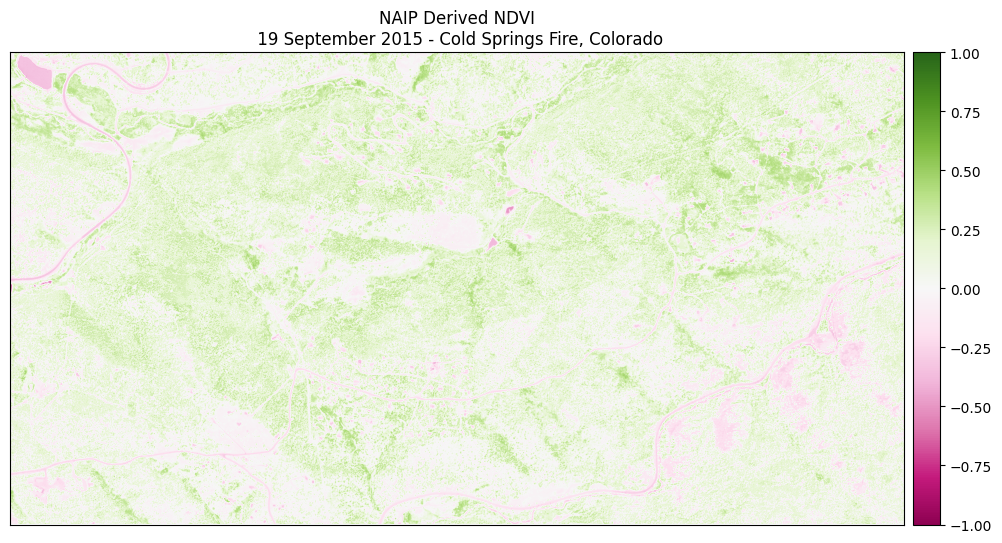

In [4]:
ep.plot_bands(naip_ndvi,
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="NAIP Derived NDVI\n 19 September 2015 - Cold Springs Fire, Colorado")
plt.show()

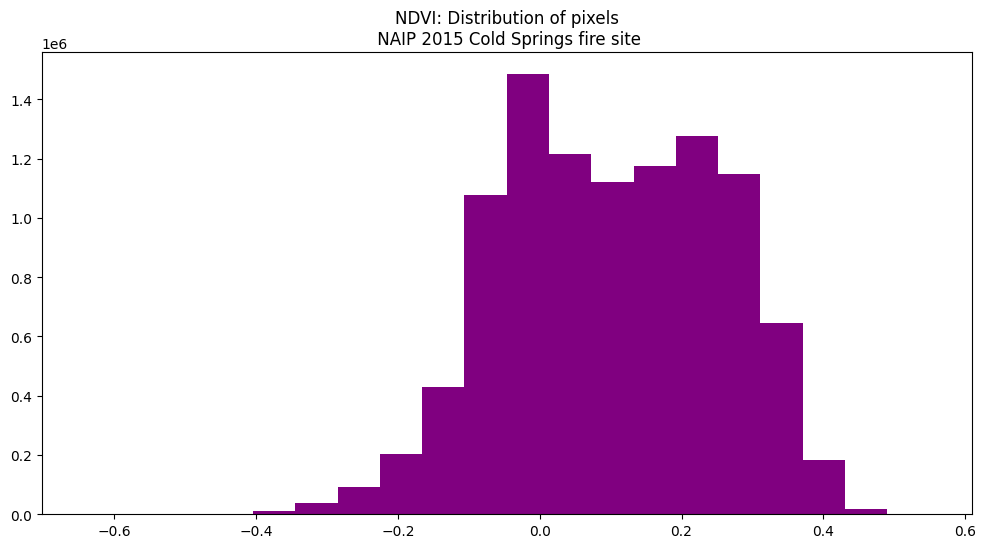

In [5]:
ep.hist(naip_ndvi.values,
        figsize=(12, 6),
        title=["NDVI: Distribution of pixels\n NAIP 2015 Cold Springs fire site"])

plt.show()

In [6]:
type(naip_ndvi), naip_ndvi.dtype

(xarray.core.dataarray.DataArray, dtype('float64'))

In [7]:
naip_ndvi_outpath = os.path.join("cold-springs-fire",
                                 "outputs",
                                 "naip_ndvi.tif")

naip_ndvi.rio.to_raster(naip_ndvi_outpath)